In [13]:
import sqlite3
import pandas as pd

testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')

def dataOfTester(tester):
    return 'SELECT * FROM '+tester

def createDataframe(tester):
    tester_df=pd.read_sql_query(dataOfTester(tester),conn)
    if(tester=='S015' or tester=='S021'):
            tester_df=tester_df.drop(columns=['index'])
    if(tester=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
    return tester_df

tester_df = [createDataframe(tester) for tester in testers]

tester_df[0]['timestamp']=pd.to_datetime(tester_df[0]['timestamp'])
timedelta_list = []

for df in tester_df:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    timedelta = df['timestamp'].iloc[1] - df['timestamp'].iloc[0]
    timedelta_list.append(timedelta)

print(timedelta_list)
for i in range(len(testers)):
    tester_df[i]['timestamp']=pd.to_datetime(tester_df[i]['timestamp'])
    interval=timedelta_list[i]
    tester_df[i]['sample']=(tester_df[i]['timestamp']-tester_df[i]['timestamp'].iloc[0])//interval
    tester_df[i].drop(columns=['timestamp'],inplace=True)



      
# tester_df[0]['sample']=(tester_df[0]['timestamp']-tester_df[0]['timestamp'].iloc[0])//interval
# tester_df[0].drop(columns=['timestamp'],inplace=True)



tester_df[4].head()



[Timedelta('0 days 00:00:00.010000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.019999995'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000')]


,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,sample
0,-3.810360,0.165219,-0.663742,-0.919657,-0.759899,0.239633,6,0
1,-0.188988,-0.235452,-1.343093,-0.137463,-0.852652,-1.423640,6,1
2,-0.060000,0.008919,-0.876293,1.347957,-0.642281,-2.081678,6,2
3,-1.222393,0.028038,-0.460220,1.063477,-2.840740,-0.143171,6,3
4,-1.026113,-0.170239,-0.163068,-3.239610,0.924564,-0.720399,6,4


In [14]:
#lets create the rolling window
rolling_window=[0]*len(tester_df)
for i in range(len(tester_df)):
    rolling_window[i] = tester_df[i].iloc[:,:-2].rolling(window=10,center=True).mean()
    rolling_window[i]['label']=tester_df[i]['label']
    rolling_window[i].bfill(limit=5, inplace=True)
    rolling_window[i].ffill(limit=5, inplace=True)

for i in rolling_window:
    print(i.tail(10))





          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
408699 -0.718071  0.035292 -0.691135  0.063827  0.068942  1.002220      7
408700 -0.716116  0.034737 -0.691002  0.073453  0.069298  1.001427      7
408701 -0.717247  0.034221 -0.689879  0.061229  0.068797  1.003284      7
408702 -0.715693  0.034660 -0.691207  0.077474  0.069538  1.001981      7
408703 -0.717548  0.034044 -0.689069  0.054243  0.068358  1.003505      7
408704 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408705 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408706 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408707 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408708 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
418979 -0.990182 -0.169308 -0.198136 -0.988800 -0.129428 -0.075978      3
418980 -0.986373 -0.163015 -0.199718 -

In [32]:
unified_df=pd.concat(rolling_window,ignore_index=True)

In [33]:
unified_df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
1,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
2,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
3,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6
4,-0.87638,0.114158,0.076672,-1.130216,-0.063653,-0.159632,6


In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

review=unified_df['label']
unified_df.drop(columns=['sample','label'],inplace=True,errors='ignore')


In [36]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()
scaled_df=unified_df.copy()
# Select the columns to normalize
columns_to_normalize = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

# Normalize the selected columns
scaled_df[columns_to_normalize] = scaler.fit_transform(unified_df[columns_to_normalize])

scaled_df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
0,0.028784,0.630468,0.712095,-1.088233,-0.338169,-0.874013
1,0.028784,0.630468,0.712095,-1.088233,-0.338169,-0.874013
2,0.028784,0.630468,0.712095,-1.088233,-0.338169,-0.874013
3,0.028784,0.630468,0.712095,-1.088233,-0.338169,-0.874013
4,0.028784,0.630468,0.712095,-1.088233,-0.338169,-0.874013


In [38]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


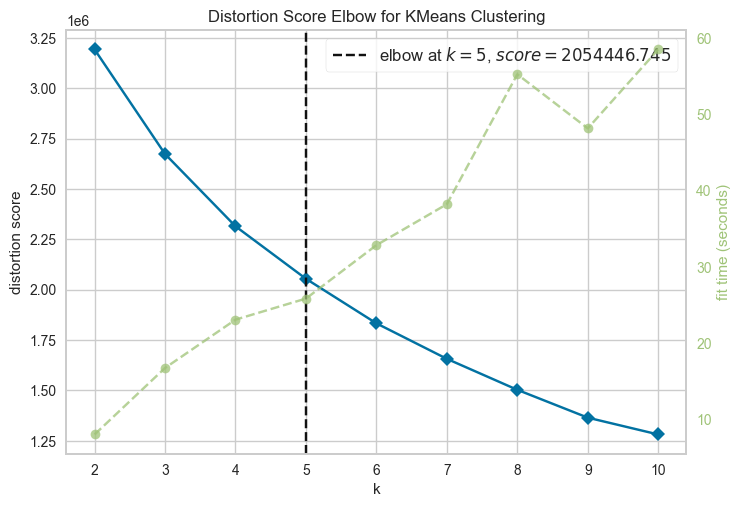

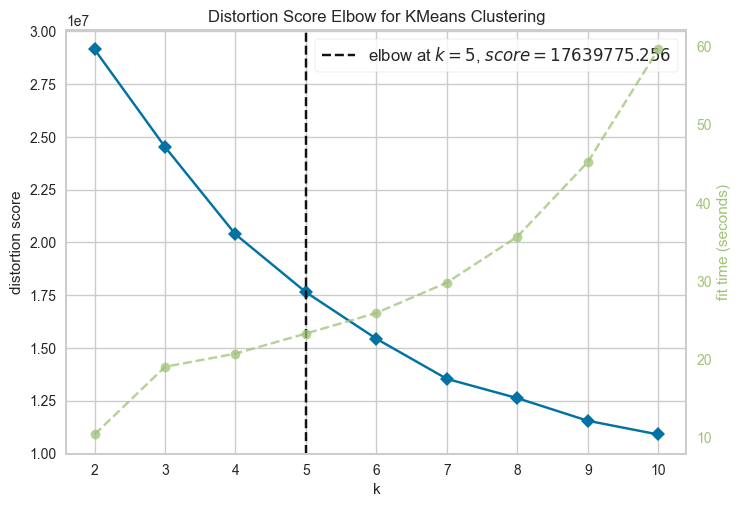

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
kmeans = KMeans(n_init=10)
sil_vis = KElbowVisualizer(kmeans,numeric_only=None)
sil_vis.fit(unified_df)
sil_vis.show()

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_init=10)
sil_vis = KElbowVisualizer(kmeans,numeric_only=None)
sil_vis.fit(scaled_df)
sil_vis.show()

In [41]:
# inertia = []
# K = range(1, 10)
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(unified_df)
#     inertia.append(kmeans.inertia_)

# # Plot the elbow curve
# plt.figure(figsize=(8, 6))
# plt.plot(K, inertia, 'bx-')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method For Optimal k')
# plt.show()

# Apply KMeans with the chosen number of clusters (assumed 3 for this example)
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(unified_df)
unified_df['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with the cluster labels
print(unified_df.head())

# # Analyze the clusters
# print(unified_df.groupby('Cluster').mean())

# # Plot the clusters (optional)
# plt.figure(figsize=(8, 6))
# plt.scatter(unified_df['back_x'], unified_df['back_y'], c=unified_df['Cluster'], cmap='viridis')
# plt.xlabel('back_x')
# plt.ylabel('back_y')
# plt.title('Cluster Visualization')
# plt.show()


    back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  Cluster
0 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632        3
1 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632        3
2 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632        3
3 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632        3
4 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632        3


In [44]:
comparison = pd.merge(unified_df, pd.DataFrame({'review': review}), left_index=True, right_index=True)
contingency_table = pd.crosstab(comparison['review'], comparison['Cluster'])
print(contingency_table)

Cluster       0       1        2        3       4
review                                           
1         14586    1135    45532  1135881      21
2         42272   14063    19115   215472     434
3           673     137     6432   247596       1
4          1511       5     4182    70517       2
5           377       6     2106    64764       0
6           471    1141    13986   727882       0
7         55427  668426  2173916     4475     459
8        190662  104790    26050      142  107254
13        31674    7866   104863   249560       0
14         2922     587     1741    50564       0
130         538     299     3931    37017       0
140           0      20      809     7036       0


In [51]:
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(scaled_df)
scaled_df['Cluster'] = kmeans.labels_

print(scaled_df.head())

     back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  Cluster
0  0.028784  0.630468  0.712095 -1.088233 -0.338169 -0.874013        0
1  0.028784  0.630468  0.712095 -1.088233 -0.338169 -0.874013        0
2  0.028784  0.630468  0.712095 -1.088233 -0.338169 -0.874013        0
3  0.028784  0.630468  0.712095 -1.088233 -0.338169 -0.874013        0
4  0.028784  0.630468  0.712095 -1.088233 -0.338169 -0.874013        0


In [53]:
comparison_scaled = pd.merge(scaled_df, pd.DataFrame({'review': review}), left_index=True, right_index=True)
contingency_table_scaled = pd.crosstab(comparison_scaled['review'], comparison_scaled['Cluster'])
print(contingency_table_scaled)

Cluster        0       1        2       3       4
review                                           
1        1151350      42    38042    6750     971
2         226818      59    12507   36961   15011
3         247809      58     5686     626     660
4          71263       0     4508      60     386
5          65823       3     1336      40      51
6         726706       0    14671    1773     330
7          28154     637  2226593  615898   31421
8           2073  122852      795   91860  211318
13        293799       3    78710   20764     687
14         49959       0     1317    3074    1464
130        37564       0     3358     718     145
140         7238       0      467     160       0


In [54]:
#lets reduce the data a little bit
reduced_df=unified_df.copy()
reduced_df=reduced_df.iloc[::10,:] #every 10th row


print(reduced_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646133 entries, 0 to 6461320
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   back_x   646133 non-null  float64
 1   back_y   646133 non-null  float64
 2   back_z   646133 non-null  float64
 3   thigh_x  646133 non-null  float64
 4   thigh_y  646133 non-null  float64
 5   thigh_z  646133 non-null  float64
 6   Cluster  646133 non-null  int32  
dtypes: float64(6), int32(1)
memory usage: 32.0 MB
None


In [55]:
#lets reduce the data a little bit
reduced_scaled_df=scaled_df.copy()
reduced_scaled_df=reduced_scaled_df.iloc[::10,:] #every 10th row


print(reduced_scaled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646133 entries, 0 to 6461320
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   back_x   646133 non-null  float64
 1   back_y   646133 non-null  float64
 2   back_z   646133 non-null  float64
 3   thigh_x  646133 non-null  float64
 4   thigh_y  646133 non-null  float64
 5   thigh_z  646133 non-null  float64
 6   Cluster  646133 non-null  int32  
dtypes: float64(6), int32(1)
memory usage: 32.0 MB
None


In [60]:
from sklearn.cluster import DBSCAN
import numpy as np
# Assuming you have your data stored in a numpy array called 'data'
# data.shape should be (n_samples, n_features)

# Create an instance of DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the data to the DBSCAN model
dbscan.fit(unified_df)

# # Get the cluster labels assigned by DBSCAN
# labels = dbscan.labels_

# # Get the number of clusters (excluding noise points)
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# # Get the indices of the core samples
# core_samples_mask = np.zeros_like(labels, dtype=bool)
# core_samples_mask[dbscan.core_sample_indices_] = True

# # Print the cluster labels and the number of clusters
# print("Cluster labels:", labels)
# print("Number of clusters:", n_clusters)